---
## Ensemble Learning
---

## Project- Building Basic predictive models over the NYC Taxi Trip dataset.

**You are provided with the NYC Taxi Trip Dataset. This dataset contains information about the taxi trips that took place in different parts of New York City and how much time did that trip take to complete.**

**In this project, the following are the tasks you have to complete**
1. Build a K-Nearest neighbours model for the given dataset and find the best value of K.
2. Build a Linear model for the given dataset with regularisation.
3. Build a Random Forest model for the given dataset.
4. Build a Gradient Boosting model for the given dataset.
5. Combine all the models above using the averaging technique to generate the final predictions.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
df=pd.read_csv("datasets/nyc_taxi_trip_duration.csv")

In [3]:
#chaecking the shape of data
df.shape

(729322, 11)

In [4]:
#Reading the top 5 lines of data
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


### Data Preprocessing

In [5]:
#Checking the null values
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
#Checking the datatype of each variable
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
#Coverting data type
df["vendor_id"]=df["vendor_id"].astype("category")

In [8]:
#converting strings to datetime feature
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"])

In [9]:
#Extracting weekday and hour feature from datetime feature
df["day_of_week"]=df["pickup_datetime"].dt.weekday
df["hour_of_day"]=df["pickup_datetime"].dt.hour

In [10]:
#Dropping the columns id,pickup datetime and dropoff datetime
df=df.drop(["id","pickup_datetime","dropoff_datetime"],axis=1)

In [11]:
#checking the dataframe
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,16
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4,23
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,6,17
3,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,9
4,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,6


In [12]:
#Import the library for calculating the distance
from geopy.distance import great_circle

In [13]:
#Defining a function to takr coordinates as inputs and return us distance
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(dropoff_lat,dropoff_long)
    return great_circle(start_coordinates,stop_coordinates).km

In [14]:
#Applying the function to our  dataset and creating the feature "distance"
df["distance"]=df.apply(lambda x: cal_distance(x["pickup_latitude"],x["pickup_longitude"]
                                               ,x["dropoff_latitude"],x["dropoff_longitude"]),axis=1)

In [15]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,distance
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,0,16,1.199074
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4,23,4.129117
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,6,17,7.250763
3,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,9,2.361101
4,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,6,4.328540


In [16]:
#Importing label encoder for converting categorical values into numeric variable
from sklearn.preprocessing import LabelEncoder

In [17]:
#Transforming each feature
le=LabelEncoder()
df["vendor_id"]=le.fit_transform(df["vendor_id"])
df["store_and_fwd_flag"]=le.fit_transform(df["store_and_fwd_flag"])

In [18]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,distance
0,1,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0,16,1.199074
1,0,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,23,4.129117
2,1,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,17,7.250763
3,1,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,9,2.361101
4,0,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,6,4.328540


### Outlier Detection And Removal

#### (a). Trip Duration

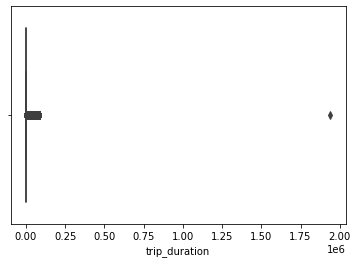

In [19]:
sns.boxplot(df["trip_duration"])
plt.show()

As we can observe, there is a huge outlier so it's difficult to visualize hence we'll take log transformation.

In [20]:
#taking log for better visualisation
df["log_trip_duration"]=np.log(df["trip_duration"].values+1)

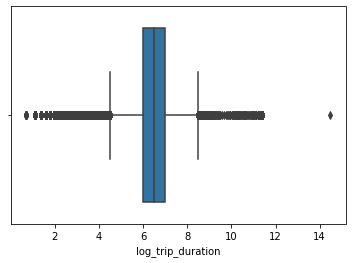

In [21]:
#Again plotting the trip duration
sns.boxplot(df["log_trip_duration"])
plt.show()

In [22]:
#Selecting the range of log tripduration between 4.53 and 8.45 for outlier removal
df=df.loc[(df["log_trip_duration"]>4.53)&(df["log_trip_duration"]<8.45)]

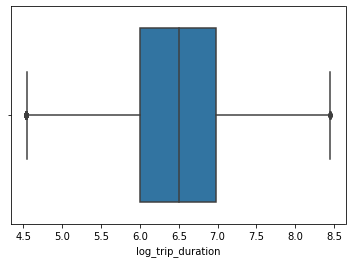

In [23]:
#Plotting the variable
sns.boxplot(df["log_trip_duration"])
plt.show()

#### (b) pickup_latittude,pickup_longitude,dropoff_longitude and dropoff_latittude

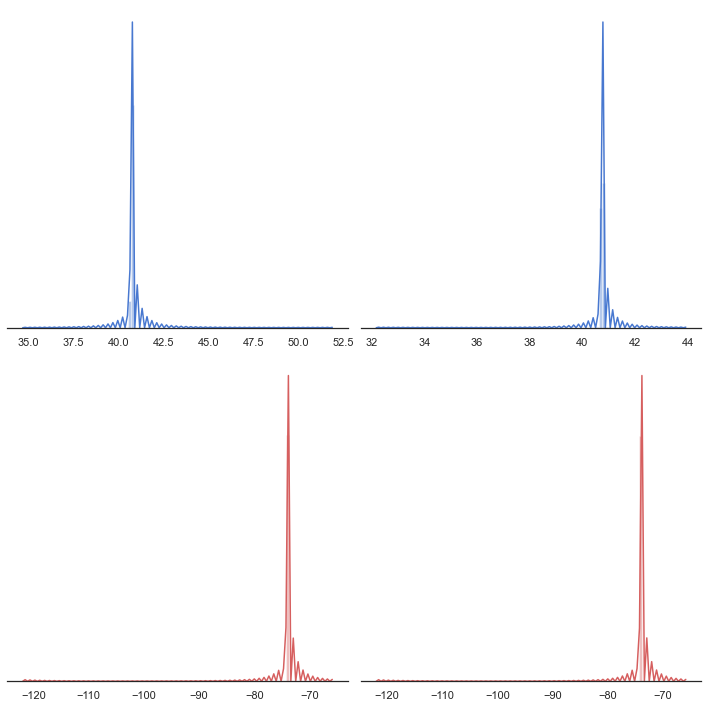

In [24]:
#Analysing latittudes and longitudes of the trips
sns.set(style="white",palette="muted",color_codes=True)
f,axes=plt.subplots(2,2,figsize=(10,10),sharex=False,sharey=False)
sns.despine(left=True)
sns.distplot(df["pickup_latitude"].values,label="pickup_latitude",color="b",bins=100,ax=axes[0,0])
sns.distplot(df["pickup_longitude"].values,label="pickup_longitude",color="r",bins=100,ax=axes[1,0])
sns.distplot(df["dropoff_latitude"].values,label="dropoff_latitude",color="b",bins=100,ax=axes[0,1])
sns.distplot(df["dropoff_longitude"].values,label="dropoff_longitude",color="r",bins=100,ax=axes[1,1])
plt.setp(axes,yticks=[])
plt.tight_layout()
plt.show()

In [25]:
#Removing Outliers

df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]

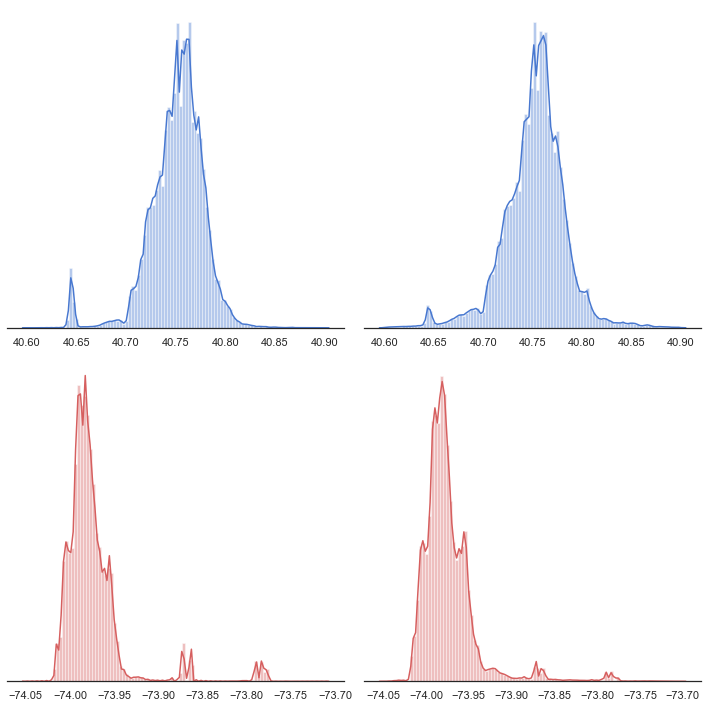

In [26]:
#Visualising after outlier removal

sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0, 0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1, 0])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0, 1])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [27]:
#Dropping the log trip duration,dropoff latitude and dropoff longitude, as only pickup points are more important to find out
#the locality with higher trips.
df=df.drop(["log_trip_duration","dropoff_latitude","dropoff_longitude"],axis=1)

## Q1. Build a K-Nearest neighbours model for the given dataset and find the best value of K.

In [28]:
#Reading the dataframe
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_day,distance
0,1,1,-73.953918,40.778873,0,400,0,16,1.199074
1,0,2,-73.988312,40.731743,0,1100,4,23,4.129117
2,1,2,-73.997314,40.721458,0,1635,6,17,7.250763
3,1,6,-73.961670,40.759720,0,1141,1,9,2.361101
4,0,1,-74.017120,40.708469,0,848,2,6,4.328540


### Segregating  variables: Independent and Dependent variables

In [29]:
#Features
x=df.drop(["trip_duration"],axis=1)

#Target
y=df["trip_duration"]

x.shape,y.shape

((716140, 8), (716140,))

### Scaling the  data(Using MinMax Scaler)

In [30]:
#Importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [31]:
#Creating the dataframes from scaled data and storing in to a variable
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,store_and_fwd_flag,day_of_week,hour_of_day,distance
0,1.0,0.111111,0.282868,0.596506,0.0,0.000000,0.695652,0.036258
1,0.0,0.222222,0.181487,0.438738,0.0,0.666667,1.000000,0.124856
2,1.0,0.222222,0.154950,0.404311,0.0,1.000000,0.739130,0.219249
3,1.0,0.666667,0.260019,0.532390,0.0,0.166667,0.391304,0.071395
4,0.0,0.111111,0.096568,0.360831,0.0,0.333333,0.260870,0.130887


In [32]:
#Importing the train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state = 56)

### Implementing KNN Regressor

In [33]:
#Importing KNN regressor
from sklearn.neighbors import KNeighborsRegressor as KNN

In [34]:
#creating instance for KNN
knn=KNN()

In [35]:
#Taking the hyperparameters
parameter_grid = {
    'n_neighbors' : [19, 20, 21]
}

In [36]:
#Importing Grid search and imputing hyperparameters
from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(estimator=knn,param_grid=parameter_grid,scoring="neg_mean_squared_error",cv=3)

In [37]:
#Fitting the train dataset
gridsearch.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [19, 20, 21]},
             scoring='neg_mean_squared_error')

In [38]:
#Finding the best parameter
gridsearch.best_params_

{'n_neighbors': 20}

In [39]:
#Taking the parameters and imputing in it KNN
#Intance of KNN
knn=KNN(n_neighbors=20)

#Fitting the model
knn.fit(train_x,train_y)

#Predicting over train and test set
pred_y=knn.predict(test_x)

In [40]:
knn.score(test_x,test_y)

0.7136209854097857

### The best value of k or n_neighbors found out is 20.

---

# Q2. Build a Linear model for the given dataset with regularisation.

In [41]:
x.shape,y.shape

((716140, 8), (716140,))

In [42]:
# Importing linear regression
from sklearn.linear_model import LinearRegression

In [43]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LinearRegression(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [44]:
# Predicting over train and test dataset
train_y_pred_linear_regression = lr.predict(train_x)
test_y_pred_linear_regression = lr.predict(test_x)

In [45]:
# Calculating the score on test dataset
lr.score(test_x, test_y)

0.5949312564995467

### Regularisation using Lasso

In [46]:
#Import lasso model from sklearns linear model module
from sklearn.linear_model import Lasso

In [47]:
# Creating the instance for lasso
lasso= Lasso(normalize = True)

In [48]:
#Defining the values of alpha for hyperparameter tuning
parameter_grid={"alpha": [1e-12, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10]}

In [49]:
# Importing Grid Search
from sklearn.model_selection import GridSearchCV

In [50]:
# Imputing the hyperparametrs into Grid Search
gridsearch = GridSearchCV(estimator= lasso, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=3)

In [51]:
# Fitting the train data
gridsearch.fit(train_x, train_y)

GridSearchCV(cv=3, estimator=Lasso(normalize=True),
             param_grid={'alpha': [1e-12, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10]},
             scoring='neg_mean_squared_error')

In [52]:
# Taking the best parameter
gridsearch.best_params_

{'alpha': 0.0001}

In [53]:
#Imputing the best parameter of alpha in lasso model
lasso=Lasso(alpha=0.0001,normalize=True)

In [54]:
#Fitting the train data and predicting over the test data
lasso.fit(train_x,train_y)

train_y_pred_lasso=lasso.predict(train_x)
test_y_pred_lasso=lasso.predict(test_x)

In [55]:
#Finding out the model score
lasso.score(test_x,test_y)

0.5949314420256789

# Q3. Build a Random Forest model for the given dataset. 

#### Building a Random Forest model

In [56]:
#Importing Random Forest ModelRegressor
from sklearn.ensemble import RandomForestRegressor

In [57]:
#Creating Instance for Random Forest
regressor=RandomForestRegressor(random_state=96)

In [58]:
#Taking the hyperparameters and their values in a dictionary
parameter_grid={"n_estimators": [90,100],
               "max_depth": [13, 14]}

In [59]:
#Importing Randomized search
from sklearn.model_selection import RandomizedSearchCV

In [60]:
#Imputing the parameter values taken into Randomized search
randomsearch=RandomizedSearchCV(estimator=regressor, param_distributions = parameter_grid, n_iter= 6, cv=3)

In [81]:
#Train the model
randomsearch.fit(train_x,train_y)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=96),
                   n_iter=6,
                   param_distributions={'max_depth': [13, 14],
                                        'n_estimators': [90, 100]})

In [82]:
#Taking the combination of best parameter
randomsearch.best_params_

{'n_estimators': 100, 'max_depth': 14}

In [83]:
#Creating Instance for Random Forest
regressor=RandomForestRegressor(n_estimators=100,max_depth=14,random_state=96)

In [84]:
# Fitting the training data into Random Forest model
regressor.fit(train_x, train_y)

RandomForestRegressor(max_depth=14, random_state=96)

In [85]:
# Predicting over train and test dataset
train_y_pred_random_forest = regressor.predict(train_x)
test_y_pred_random_forest = regressor.predict(test_x)

In [86]:
# Score on training data
regressor.score(train_x, train_y)

0.7827913710245661

In [87]:
# Score on test data
regressor.score(test_x, test_y)

0.7366674891822393

In [88]:
# Feature importance
regressor.feature_importances_

array([1.01528069e-03, 2.63653031e-03, 2.94147340e-02, 2.73597246e-02,
       3.15275871e-04, 3.26133041e-02, 8.36148381e-02, 8.23030312e-01])

In [89]:
# Feature importance against each variable
pd.Series(regressor.feature_importances_, index=train_x.columns)

vendor_id             0.001015
passenger_count       0.002637
pickup_longitude      0.029415
pickup_latitude       0.027360
store_and_fwd_flag    0.000315
day_of_week           0.032613
hour_of_day           0.083615
distance              0.823030
dtype: float64

# Q4. Build a Gradient Boosting model for the given dataset.

#### Building a GBDT Model

In [90]:
#Importing GBDT Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [91]:
#Creating an Gradient Boosting Instance
gbr=GradientBoostingRegressor(random_state=96)

In [92]:
#Taking the hyperparameter and into GridSearch
parameter_grid={"n_estimators": [80, 100],
               "max_depth": [8, 9, 10]}

In [93]:
#Importing GridSearchCv
from sklearn.model_selection import GridSearchCV

In [94]:
#Imputing hyperparameter into Grid Search
gridsearch=GridSearchCV(estimator=gbr,param_grid=parameter_grid,scoring="neg_mean_squared_error",cv=3)

In [95]:
#Fitting the train set in gridseaarch
gridsearch.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=96),
             param_grid={'max_depth': [8, 9, 10], 'n_estimators': [80, 100]},
             scoring='neg_mean_squared_error')

In [96]:
# Taking the best parameter
gridsearch.best_params_

{'max_depth': 9, 'n_estimators': 100}

In [97]:
#Creating an instance for gradient descent on best parameters
gbr=GradientBoostingRegressor(random_state=96,n_estimators=100,max_depth=9)

In [98]:
# Training the model
gbr.fit(train_x,train_y)

GradientBoostingRegressor(max_depth=9, random_state=96)

In [99]:
# Predicting over train and test dataset
train_y_pred_grad_boost = gbr.predict(train_x)
test_y_pred_grad_boost = gbr.predict(test_x)

In [100]:
# Calculating score on test data
gbr.score(test_x, test_y)

0.7426695832734327

---

# Q5. Combine all the models above using the averaging technique to generate the final predictions.

In [102]:
#Taking mean of all the models i.e. the final prediction and storing it in an array
from statistics import mean
final_pred=np.array([])
for i in range(0,len(test_x)):
    final_pred=np.append(final_pred,mean([pred_y[i],
                                         test_y_pred_linear_regression[i],
                                         test_y_pred_lasso[i],
                                         test_y_pred_random_forest[i],
                                         test_y_pred_grad_boost[i]]))

In [105]:
#Importing R2 score
from sklearn.metrics import r2_score

In [106]:
#Calculating R2 score
r2_score(final_pred,test_y)

0.5455786088879159